In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# Paso 0: Cargo datos

### NOTAR EL index_col. Esto es importante para cuando se mergean datos

In [2]:
# Variables exógenas, predictores, covariables, features, X
# 
aord = pd.read_csv('data/ALLOrdinary.csv', index_col='Date')
nikkei = pd.read_csv('data/Nikkei225.csv', index_col='Date')
hsi = pd.read_csv('data/HSI.csv', index_col='Date')
daxi = pd.read_csv('data/DAXI.csv', index_col='Date')
cac40 = pd.read_csv('data/CAC40.csv', index_col='Date')
sp500 = pd.read_csv('data/SP500.csv', index_col='Date')
dji = pd.read_csv('data/DJI.csv', index_col='Date')
nasdaq = pd.read_csv('data/nasdaq_composite.csv', index_col='Date')

# Variable endógena, Y
spy = pd.read_csv('data/SPY.csv', index_col='Date')

In [3]:
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


In [4]:
nikkei.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-04,15155.730469,15156.660156,14542.580078,14691.410156,14691.410156,98700.0
2008-01-07,14549.379883,14667.849609,14438.610352,14500.549805,14500.549805,139800.0
2008-01-08,14429.299805,14547.799805,14365.860352,14528.669922,14528.669922,146800.0
2008-01-09,14364.709961,14602.650391,14271.570313,14599.160156,14599.160156,155500.0
2008-01-10,14546.320313,14584.730469,14388.110352,14388.110352,14388.110352,130100.0


### Notar que nasdaq y nikkei arrancan en fechas diferentes

# Paso 1: preprocesamiento de los datos

In [5]:
# Mostrar como trabaja el shift con las fechas como indices
# sp500['Open'].shift(1)

In [6]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,146.529999,146.990005,143.880005,144.929993,116.593864,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,116.537567,125133300
2008-01-04,143.339996,143.440002,140.910004,141.309998,113.681671,232330900
2008-01-07,141.809998,142.229996,140.100006,141.190002,113.585121,234991000
2008-01-08,142.080002,142.899994,138.440002,138.910004,111.750923,326365700


In [7]:
# Creamos DF con data mergeada
indicepanel=pd.DataFrame(index=spy.index)

# Variable a predecir
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']

# Predictores - Notar que los shift aca son positivos +1
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500["Open"] - sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)

indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)

# Australia
indicepanel['aord'] = aord['Close'] - aord['Open']

# Hang Seng Index (Hong Kong)
indicepanel['hsi'] = hsi['Close'] - hsi['Open']

# Japon
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']

indicepanel['Price'] = spy['Open']

In [8]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


### Verificamos si tenemos NAN

In [9]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        30
daxi         53
aord        319
hsi         121
nikkei      145
Price         0
dtype: int64

In [10]:
# Analizo algunos
indicepanel[indicepanel.isnull()['daxi']][:3]

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-03-24,1.550003,3.259995,30.619995,47.699951,259.54004,NaN,NaN,136.400390,NaN,7.030274,133.309998
2008-05-01,3.959991,-0.909988,-5.250000,-17.709961,-13.11036,NaN,NaN,-1.500000,NaN,-35.729492,138.380005


In [11]:
indicepanel.loc['2008-03-20':'2008-03-27']

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-03-20,3.259995,-4.089996,-31.299927,-51.620117,-289.08984,-124.049805,-98.180175,NaN,-65.080078,NaN,130.050003
2008-03-24,1.550003,3.259995,30.619995,47.699951,259.54004,NaN,NaN,136.400390,NaN,7.030274,133.309998
2008-03-25,-0.399994,1.550003,18.779907,60.959961,185.37011,181.199707,112.390136,58.199707,622.740234,105.479493,134.860001
2008-03-26,-0.260010,-0.399994,3.380005,-0.539795,-15.54980,-33.660156,64.979981,4.899902,35.259766,57.660156,134.460007
2008-03-27,-1.209992,-0.260010,-12.109985,-13.580078,-109.91016,9.480468,-22.410156,-17.299805,351.650390,-13.839844,134.199997


In [12]:
# Usamos 'fillna()' para llenar los datos que no tenemos
indicepanel = indicepanel.fillna(method='ffill')

In [13]:
# Vemos como quedo corregido al na
indicepanel.loc['2008-03-20':'2008-03-27']

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-03-20,3.259995,-4.089996,-31.299927,-51.620117,-289.08984,-124.049805,-98.180175,-120.899903,-65.080078,118.110352,130.050003
2008-03-24,1.550003,3.259995,30.619995,47.699951,259.54004,-124.049805,-98.180175,136.400390,-65.080078,7.030274,133.309998
2008-03-25,-0.399994,1.550003,18.779907,60.959961,185.37011,181.199707,112.390136,58.199707,622.740234,105.479493,134.860001
2008-03-26,-0.260010,-0.399994,3.380005,-0.539795,-15.54980,-33.660156,64.979981,4.899902,35.259766,57.660156,134.460007
2008-03-27,-1.209992,-0.260010,-12.109985,-13.580078,-109.91016,9.480468,-22.410156,-17.299805,351.650390,-13.839844,134.199997


In [14]:
indicepanel.isnull().sum()

spy         0
spy_lag1    1
sp500       1
nasdaq      1
dji         1
cac40       1
daxi        1
aord        0
hsi         0
nikkei      2
Price       0
dtype: int64

In [15]:
indicepanel[indicepanel.isnull()['nikkei']]

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004


In [16]:
# Las que quedan eran por que empezaban más tarde
indicepanel = indicepanel.dropna()

In [17]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [18]:
# save this indicepanel for part 4.5
path_save = 'data/indicepanel.csv'
indicepanel.to_csv(path_save)

In [19]:
print(indicepanel.shape)

(2677, 11)


# Paso 2: Split de los datos

In [20]:
# Split en Train y test
N1 = 2000
N2 = 1000
Train = indicepanel.iloc[-N1:-N2, :]
Test = indicepanel.iloc[-N2:, :]
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


In [24]:
Train.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2010-09-13,-0.080002,1.459999,8.810059,24.719971,43.58984,62.219970,72.289551,40.900390,261.449218,-3.819335,112.580002
2010-09-14,-0.180000,-0.080002,7.780029,17.510010,86.13086,2.139893,3.270019,7.700196,-64.691406,-20.190430,112.500000
2010-09-15,0.410003,-0.180000,-1.729980,1.859863,-18.31055,8.810058,20.740235,32.600097,-94.308594,-20.190430,112.320000
2010-09-16,0.309998,0.410003,4.459961,14.340088,45.33008,-18.280029,-27.379883,-53.000000,-2.761719,-104.389648,112.730003
2010-09-17,-0.160004,0.309998,2.500000,20.909912,23.79981,20.330078,42.790039,27.399903,226.330078,44.439453,113.040001


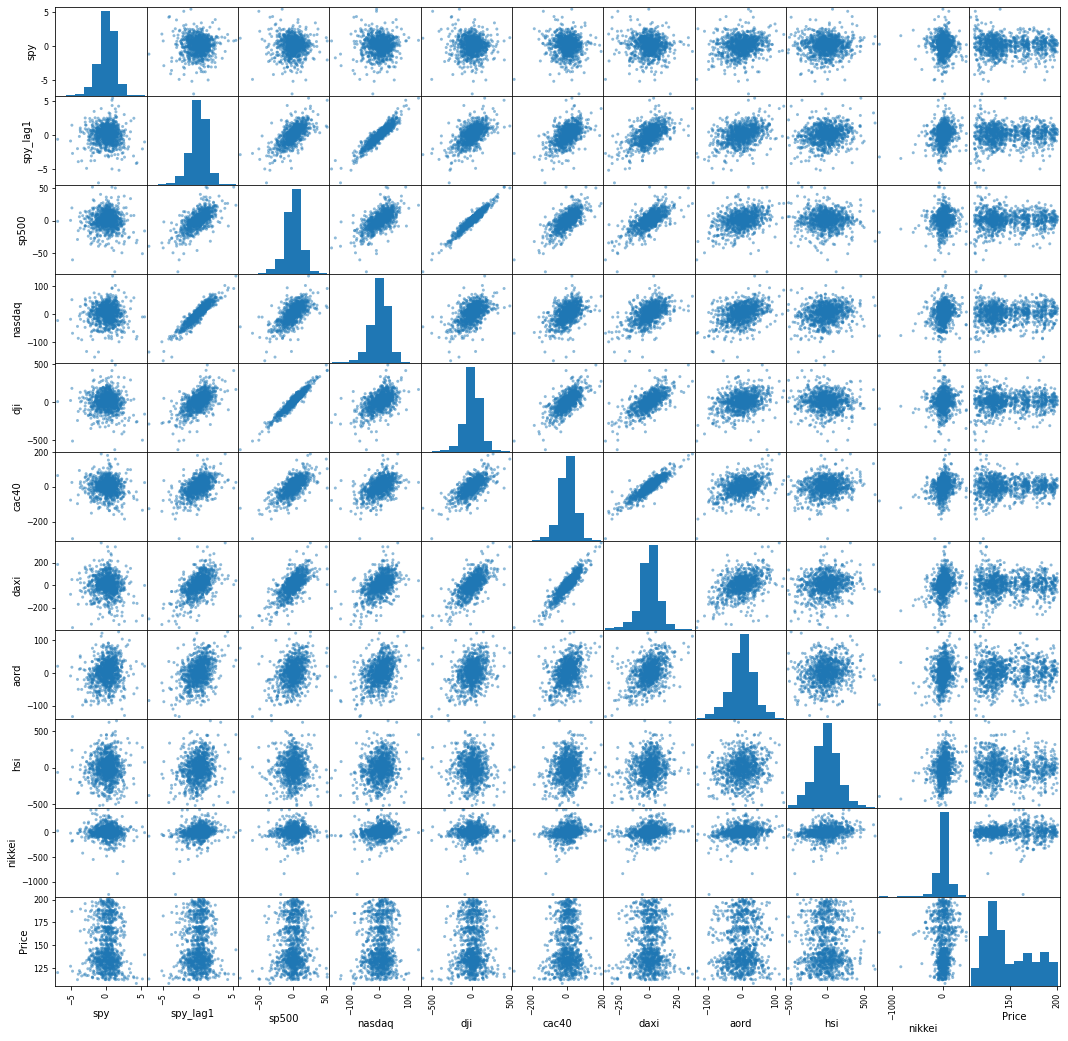

In [25]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(18, 18))

In [26]:
# Correlación con spy
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.011623
sp500      -0.018632
nasdaq      0.012333
dji        -0.037097
cac40      -0.055304
daxi       -0.069735
aord        0.179638
hsi         0.031400
nikkei     -0.035048
Name: spy, dtype: float64


# Paso 3 - Entrenamiento y resultados

In [27]:
from sklearn import linear_model

In [28]:
Train.mean()

spy           0.088800
spy_lag1      0.089850
sp500         0.899500
nasdaq        2.353340
dji           6.682410
cac40         0.753868
daxi          3.396010
aord          1.476792
hsi         -11.534771
nikkei       -1.625303
Price       149.076300
dtype: float64

In [29]:
Train.std()

spy           1.263934
spy_lag1      1.264637
sp500        12.666985
nasdaq       31.301435
dji         111.518862
cac40        46.208771
daxi         88.468858
aord         35.482602
hsi         166.217573
nikkei      118.515635
Price        24.593096
dtype: float64

In [30]:
################################################
X=Train.iloc[:,Train.columns!='spy'].values
y=Train.iloc[:,Train.columns=='spy'].values
X.shape, y.shape

((1000, 10), (1000, 1))

In [31]:
Xtest=Test.iloc[:,Test.columns!='spy'].values
ytest=Test.iloc[:,Test.columns=='spy'].values
Xtest.shape, ytest.shape

((1000, 10), (1000, 1))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [34]:
print(regressor.intercept_), print(regressor.coef_)
#reg = LinearRegression().fit(Train.loc[:, Train.columns == 'spy'], Train.loc[:, Train.columns != 'spy'])

[0.18055317]
[[-0.15670854  0.0223777   0.0039721  -0.00182495 -0.00030498 -0.00252002
   0.00934468  0.00031196 -0.00044278 -0.00065126]]


(None, None)

In [35]:
regressor.score(Xtest, ytest)

0.049669831462836544

In [36]:
regressor.score(X, y)

0.06765688969977457

In [37]:
regressor.coef_

array([[-0.15670854,  0.0223777 ,  0.0039721 , -0.00182495, -0.00030498,
        -0.00252002,  0.00934468,  0.00031196, -0.00044278, -0.00065126]])

In [38]:
regressor.intercept_

array([0.18055317])

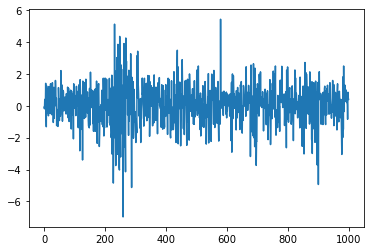

In [39]:
x = np.arange(0,len(y))
plt.plot(x,y)

In [40]:
yp=regressor.predict(X)
yptest=regressor.predict(Xtest)

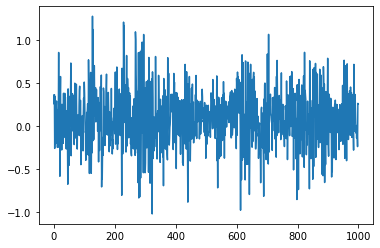

In [41]:
x = np.arange(0,len(yp))
plt.plot(x,yp)

In [42]:
from sklearn.metrics import r2_score
Rcuadtrain=r2_score(y, yp)# mirar para test
Rcuadtest=r2_score(ytest, yptest)
print(Rcuadtrain, Rcuadtest)
ind=Rcuadtest/Rcuadtrain

0.06765688969977457 0.049669831462836544


In [43]:
np.mean((y-yp)**2)

1.4879563292700755

In [44]:
######################################
# Modelos de Redes Neuronales
#####################################

In [45]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

Opcion 1:
Entrada=10; Capas=1; Salida=1
Numero de parametros a estimar= 10*1+1

In [46]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.math.divide(residual, total))
    return r2

In [47]:
tf.__version__

'2.7.0'

In [48]:
from tensorflow.keras.optimizers import SGD, Adam

In [49]:
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=100,
#     decay_rate=0.9)
optimizer_adam = keras.optimizers.Adam(learning_rate=0.01)
#optimizer_sgd = keras.optimizers.SGD(1e-2)

In [50]:
def get_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(10,), activation="relu"))
    model.add(keras.layers.Dense(1))
    model.summary()
    model.compile(optimizer=optimizer_adam, loss='mse', metrics=R_squared)
    return model

In [51]:
model = get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [52]:
def get_coefs(model):
    beta_1 = model.weights[0].numpy()[0][0]
    beta_0 = model.weights[1].numpy()[0]
    return beta_0, beta_1

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
trf = StandardScaler()
trf.fit(X)
X_norm = trf.transform(X)
Xtest_norm = trf.transform(Xtest)

In [55]:
history = model.fit(X_norm, y, epochs=500, verbose=1, batch_size=250, validation_data = (Xtest_norm, ytest))

Epoch 1/500
4/4 [==============================] - 0s 28ms/step - loss: 1.5974 - R_squared: -0.0037 - val_loss: 3.0361 - val_R_squared: -0.0059
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5947 - R_squared: -5.7106e-04 - val_loss: 3.0344 - val_R_squared: -0.0053
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5934 - R_squared: -3.3079e-04 - val_loss: 3.0321 - val_R_squared: -0.0045
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5927 - R_squared: 7.0313e-04 - val_loss: 3.0311 - val_R_squared: -0.0041
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5924 - R_squared: -0.0031 - val_loss: 3.0306 - val_R_squared: -0.0039
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5913 - R_squared: -0.0022 - val_loss: 3.0274 - val_R_squared: -0.0030
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5903 - R_squared: -5.4279e-04 - val_loss: 3.0255 - val_R_

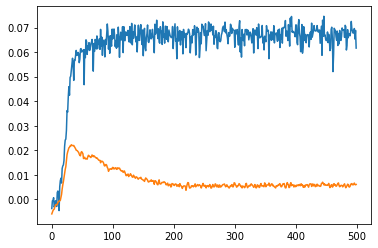

In [56]:
plt.plot(history.history["R_squared"][:])
plt.plot(history.history["val_R_squared"][:])


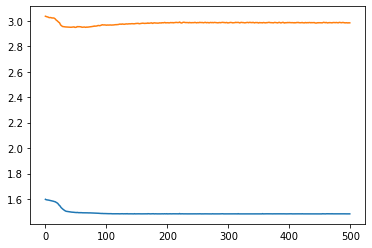

In [57]:
plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])

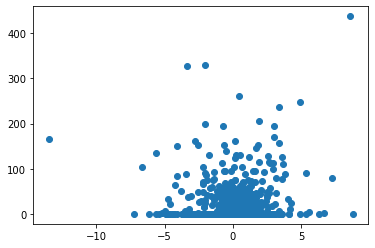

In [58]:
plt.scatter(ytest,model.predict(Xtest) )

In [59]:
model.evaluate(Xtest_norm, ytest)

32/32 [==============================] - 0s 738us/step - loss: 2.9842 - R_squared: -0.0457


[2.984224796295166, -0.04571614786982536]

In [60]:
y_test_pred = model.predict(Xtest_norm)

In [61]:
((y_test_pred - ytest)**2).mean()

2.9842248300852834

In [62]:
R_squared(ytest,y_test_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.01125522585976535>

ValueError: x and y must be the same size

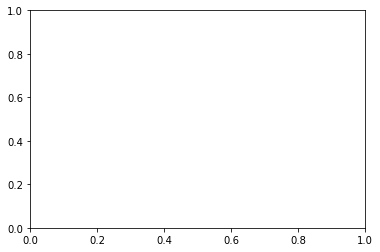

In [64]:
#x_line = np.linspace(-4, 4, 1000)
# bathch_sicze es la cantidad de filas que le pongo para que entrene el modelo
# tomo 10 datos estimo los parametros, ajusto por desenso de gradiente y vuelvo a estimar los parametros con otros 10
# y asi hasta completar toda la data, en este momento se completo un epoch
plt.scatter(X, y)
x_line = np.linspace(-4, 4, len(y))
plt.plot(x_line, model1.predict(X), color='r')

In [ ]:
################################

In [47]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
# Ordinary Least Squares
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.962
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.97e-11
Time:                        20:55:28   Log-Likelihood:                -1617.7
No. Observations:                1000   AIC:                             3255.
Df Residuals:                     990   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0836      0.039      2.138      0.033       0.007       0.160
spy_lag1      -0.1567      0.091     -1.730      0.084      -0.335       0.021
sp500          0.0221      0.014      1.621      0.105      -0.005       0.049
nasdaq         0.0040      0.004      1.066      0.287      -0.003       0.011
dji           -0.0018      0.001     -1.248      0.212      -0.005       0.001
cac40         -0.0003      0.002     -0.153      0.879      -0.004       0.004
aord           0.0093      0.001      7.492      0.000       0.007       0.012
daxi          -0.0025      0.001     -2.387      0.017      -0.005      -0.000
nikkei        -0.0004      0.000     -1.264      0.207      -0.001       0.000
hsi            0.0003      0.000      1.222      0.222      -0.000       0.001
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.687
Skew:                          -0.450   Prob(JB):                     7.45e-59
Kurtosis:                       5.369   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
# Ordinary Least Squares
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.962
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.97e-11
Time:                        21:07:59   Log-Likelihood:                -1617.7
No. Observations:                1000   AIC:                             3255.
Df Residuals:                     990   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0836      0.039      2.138      0.033       0.007       0.160
spy_lag1      -0.1567      0.091     -1.730      0.084      -0.335       0.021
sp500          0.0221      0.014      1.621      0.105      -0.005       0.049
nasdaq         0.0040      0.004      1.066      0.287      -0.003       0.011
dji           -0.0018      0.001     -1.248      0.212      -0.005       0.001
cac40         -0.0003      0.002     -0.153      0.879      -0.004       0.004
aord           0.0093      0.001      7.492      0.000       0.007       0.012
daxi          -0.0025      0.001     -2.387      0.017      -0.005      -0.000
nikkei        -0.0004      0.000     -1.264      0.207      -0.001       0.000
hsi            0.0003      0.000      1.222      0.222      -0.000       0.001
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.687
Skew:                          -0.450   Prob(JB):                     7.45e-59
Kurtosis:                       5.369   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = smf.ols(formula=formula, data=Test).fit()
lm.summary()

In [44]:
Train

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2010-09-13,-0.080002,1.459999,8.810059,24.719971,43.58984,62.219970,72.289551,40.900390,261.449218,-3.819335,112.580002
2010-09-14,-0.180000,-0.080002,7.780029,17.510010,86.13086,2.139893,3.270019,7.700196,-64.691406,-20.190430,112.500000
2010-09-15,0.410003,-0.180000,-1.729980,1.859863,-18.31055,8.810058,20.740235,32.600097,-94.308594,-20.190430,112.320000
2010-09-16,0.309998,0.410003,4.459961,14.340088,45.33008,-18.280029,-27.379883,-53.000000,-2.761719,-104.389648,112.730003
2010-09-17,-0.160004,0.309998,2.500000,20.909912,23.79981,20.330078,42.790039,27.399903,226.330078,44.439453,113.040001
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-26,0.099991,0.190003,6.849976,0.089844,67.75976,36.790039,24.889648,1.700195,-73.250000,-88.419921,200.330002
2014-08-27,-0.839997,0.099991,1.950073,10.540039,31.45899,48.239746,102.420899,14.399902,-215.740234,-21.739257,200.429993
2014-08-28,0.860001,-0.839997,-3.119995,-21.800293,8.03125,1.180176,-38.770508,-27.600097,-314.810547,-22.409179,199.589996
